In [120]:
%%capture
%run final_chars_classification.ipynb



In [121]:
%run table_detector.ipynb

In [122]:
%run final_functions.ipynb

In [123]:
%run preprocessing.ipynb

In [124]:
%run get_rows_number.ipynb

In [125]:
# initialize_models(True)
load_models()

In [126]:
from tabular import tabular
import math

In [127]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, False)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if showTrace:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(num_outputs)
        solver.solve(cells=numbers,num_col=col_num,num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        return [get_table(expression) for expression in expressions]

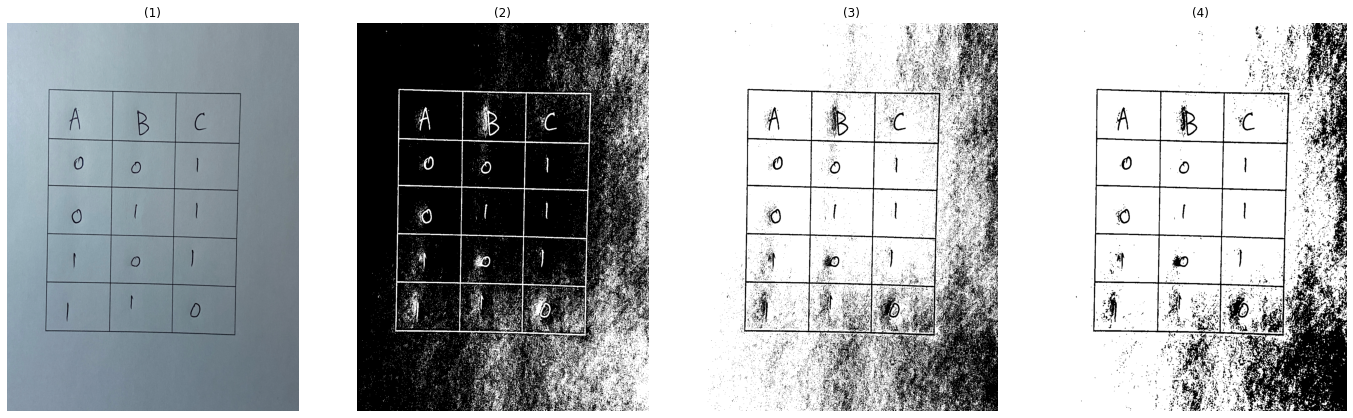

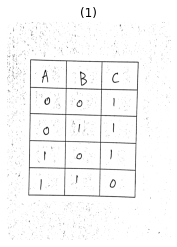

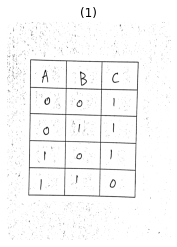

count rows 5
15
3 5


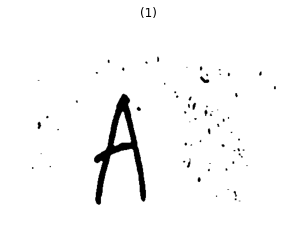

497 2448
383 3264


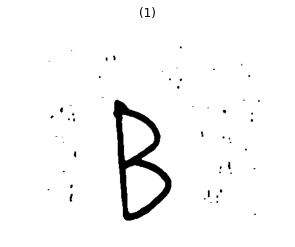

494 2448
382 3264


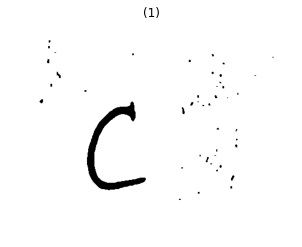

504 2448
381 3264


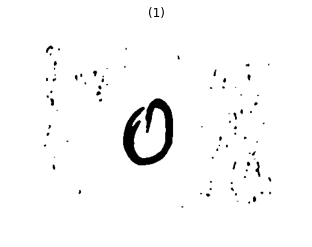

497 2448
362 3264


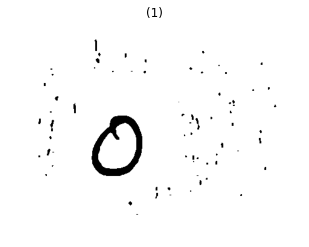

490 2448
361 3264


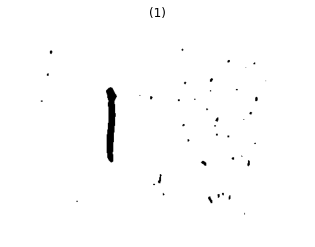

500 2448
361 3264


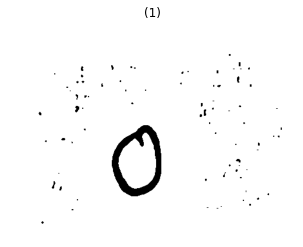

498 2448
374 3264


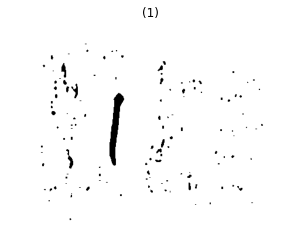

490 2448
372 3264


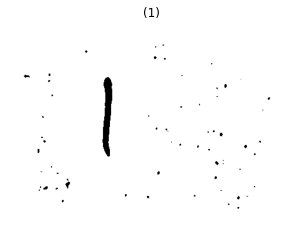

498 2448
376 3264


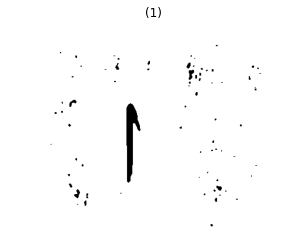

498 2448
370 3264


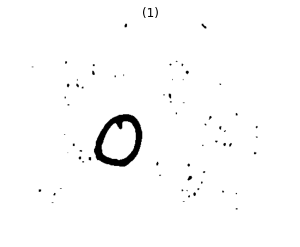

488 2448
371 3264


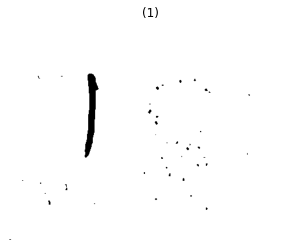

495 2448
376 3264


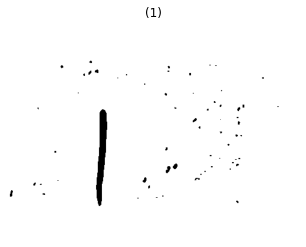

500 2448
372 3264


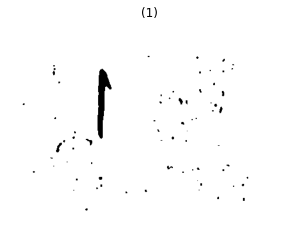

488 2448
373 3264


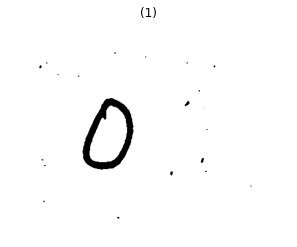

492 2448
378 3264


TypeError: only size-1 arrays can be converted to Python scalars

In [128]:
image = cv2.imread("./test_images/t28.jpg")

result = solve_expression(image, is_table=True, showTrace=True)
